In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

# Part2: 

In [2]:
df = pd.read_csv('../core/BattingPost.csv')

In [3]:
hits = df['H'].dropna()
runs= df['R'].dropna()

# Part3: 

In [4]:
df[['H','R']]

,H,R
0,1,0
1,0,1
2,1,2
3,4,3
4,3,0
5,4,3
6,0,0
7,4,3
8,2,5
9,2,3


In [5]:
print ('Mean of the hits is %.2f' %hits.mean())
print ('Standard Deviation of the hits is %.2f' %hits.std())
print ('Minimum value hits is %.2f' %hits.min())
print ('Maximum value hits is %.2f' %hits.max())
print ('Variance of the hits is %.2f' %hits.var())

print ('---------------------------------------------')

print ('Mean of the runs is %.2f' %runs.mean())
print ('Standard Deviation of the runs is %.2f' %runs.std())
print ('Minimum value runs is %.2f' %runs.min())
print ('Maximum value runs is %.2f' %runs.max())
print ('Variance of the runs is %.2f' %runs.var())

Mean of the hits is 1.90
Standard Deviation of the hits is 2.63
Minimum value hits is 0.00
Maximum value hits is 21.00
Variance of the hits is 6.89
---------------------------------------------
Mean of the runs is 0.93
Standard Deviation of the runs is 1.53
Minimum value runs is 0.00
Maximum value runs is 13.00
Variance of the runs is 2.34


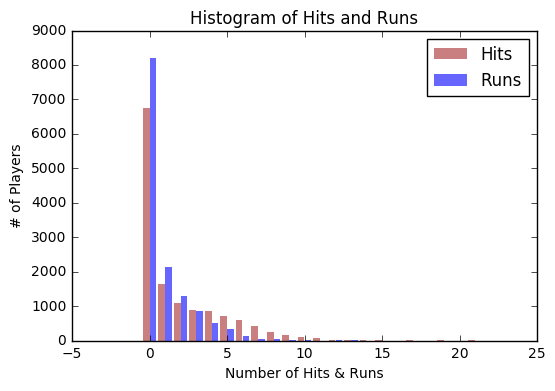

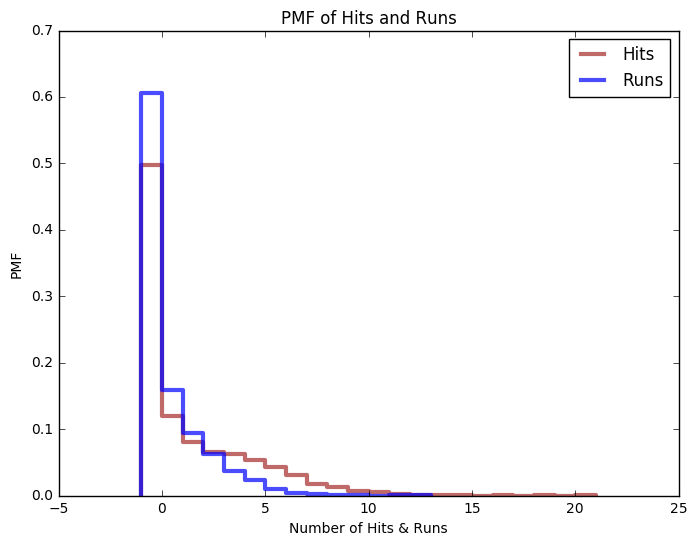

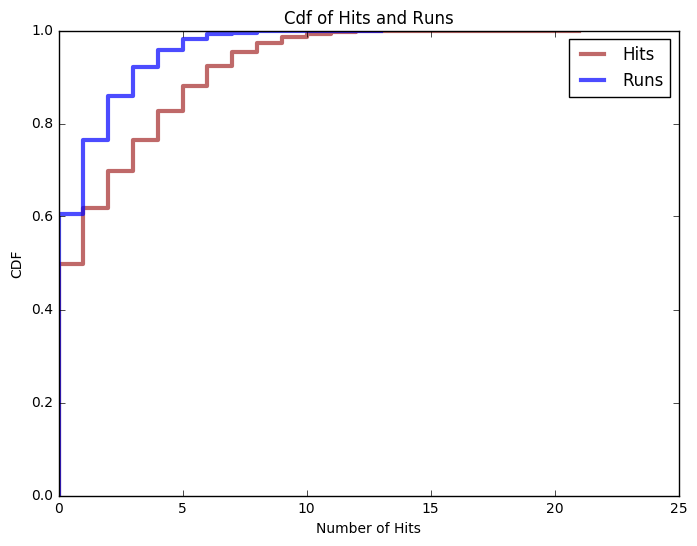

In [6]:
histogram_of_hits = thinkstats2.Hist(hits,label="Hits")
histogram_of_runs = thinkstats2.Hist(runs,label="Runs")
thinkplot.Hist(histogram_of_hits, color='Brown', width=0.45, align='right')
thinkplot.Hist(histogram_of_runs, color='Blue', width=0.45, align='left') 
thinkplot.Show(xlabel='Number of Hits & Runs', ylabel='# of Players' ,loc='upper right', title='Histogram of Hits and Runs')

histogram_of_hits1 = thinkstats2.Pmf(hits,label="Hits")
histogram_of_runs1 = thinkstats2.Pmf(runs,label="Runs")
thinkplot.PrePlot(2)
thinkplot.Pmf(histogram_of_hits1, color='Brown', align='right')
thinkplot.Pmf(histogram_of_runs1, color='Blue', align='right') 
thinkplot.Show(xlabel='Number of Hits & Runs', ylabel='PMF',loc='upper right',title='PMF of Hits and Runs')

histogram_of_hits2 = thinkstats2.Cdf(hits)
histogram_of_runs2 = thinkstats2.Cdf(runs)
thinkplot.Cdf(histogram_of_hits2, color='Brown',label="Hits")
thinkplot.Cdf(histogram_of_runs2, color='Blue',label="Runs") 
thinkplot.Show(xlabel='Number of Hits', ylabel='CDF',loc='upper right',title='Cdf of Hits and Runs')

# Part4:

In [7]:
mean_of_hits, std_of_hits = hits.mean(), hits.std()
mean_of_runs, std_of_runs = runs.mean(), runs.std()

print ('mean of hits: '+ str(mean_of_hits) +', std of hits: ' + str(std_of_hits))
print ('mean of runs: '+ str(mean_of_runs) +', std of runs: ' + str(std_of_runs))


pdf = thinkstats2.NormalPdf(mean_of_hits, std_of_hits)
pdf1 = thinkstats2.NormalPdf(mean_of_runs, std_of_runs)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

median = Median(pdf)
median1 = Median(pdf1)

print ('Median :'  + str(median))
print ('Median :'  + str(median1))

print ('Density of Pdf of Hits :' +str(pdf.Density(mean_of_hits+ std_of_hits)))
print ('Density of Pdf of Runs :' +str(pdf1.Density(mean_of_runs+ std_of_runs)))

mean of hits: 1.89514878535, std of hits: 2.62573507055
mean of runs: 0.929040832903, std of runs: 1.52851129886
Median :1.89514878535
Median :0.929040832903
Density of Pdf of Hits :0.0921535181646
Density of Pdf of Runs :0.158304832093


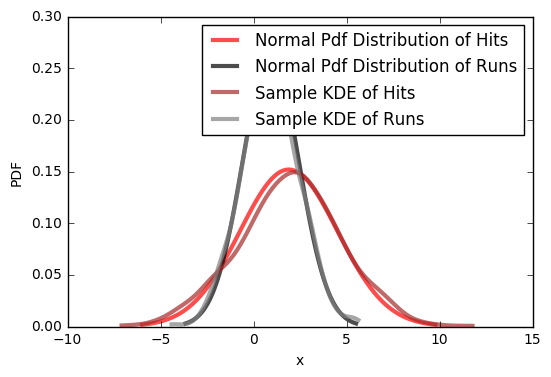

In [8]:
thinkplot.Pdf(pdf, label='Normal Pdf Distribution of Hits',color='red')
thinkplot.Pdf(pdf1, label='Normal Pdf Distribution of Runs',color='black')

sample = np.random.normal(mean_of_hits, std_of_hits, 1000)
sample1 = np.random.normal(mean_of_runs, std_of_runs, 1000)

sample_pdf = thinkstats2.EstimatedPdf(sample)
sample_pdf1 = thinkstats2.EstimatedPdf(sample1)

thinkplot.Pdf(sample_pdf, label='Sample KDE of Hits',color='brown')
thinkplot.Pdf(sample_pdf1, label='Sample KDE of Runs',color='gray')

thinkplot.Show(xlabel='x', ylabel='PDF')

In [9]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

median = Median(pdf)
median1 = Median(pdf1)
print ('Median :'  + str(median))
print ('Median :'  + str(median1))

Median :1.89514878535
Median :0.929040832903


# Part5 :

In [10]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [11]:
Cov(hits, runs)*100

320.61018963834954

In [12]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [13]:
Corr(hits, runs)*100

79.889523669054299

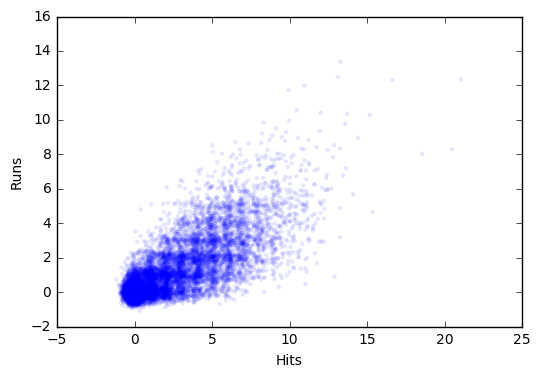

In [14]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

heights = Jitter(hits, 0.3)
weights = Jitter(runs, 0.3)

thinkplot.Scatter(heights, weights, alpha=0.1, s=10)
thinkplot.Config(xlabel='Hits',
                 ylabel='Runs',                 
                 legend=False)

# Part6:

In [15]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

0.0


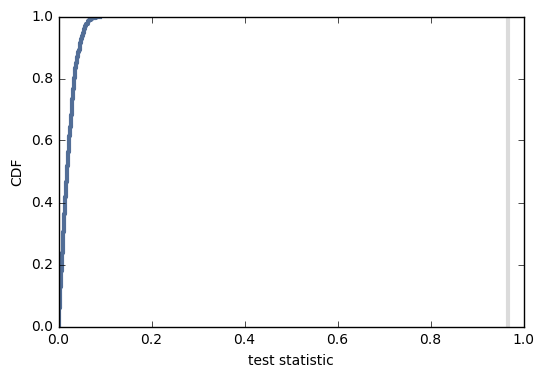

In [16]:
data = hits.values, runs.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print (pvalue)
ht.PlotCdf()
thinkplot.Show(xlabel='test statistic', ylabel='CDF')
